In [1]:
from valurap import path_planning
from valurap import gcode
import logging
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import IPython
import time
from IPython.display import display
import IPython


import imp
imp.reload(path_planning)
imp.reload(gcode)

logging.basicConfig(level=logging.DEBUG)
logging.getLogger('valurp.path_planning').setLevel(logging.DEBUG)

lines = gcode.reader("test.gcode")
pg = gcode.path_gen(lines)
sg = gcode.gen_segments(pg)
todo = []

for i, s in enumerate(sg):
    #print(str(s)[:100])
    if isinstance(s, gcode.do_move):
        print(i, s)
        if i != 4:
            assert s.deltas.get("X", 0) == 0
            assert s.deltas.get("Y", 0) == 0
    if isinstance(s, gcode.do_segment):
        print("segment", i, len(s.path))
        if i > 135:
            break
        elif i >= 127 and i <= 225:
            todo.append(s)

seg = np.array(todo[0].path)

Do Home
do_home
Set current ['E0']
Set current ['E0']
Set current ['E0']
Set current ['E0']
1 do_move(deltas={'Z': 2.5, 'F': 6000.0, 'line': 20})
2 do_move(deltas={'E': 3.0, 'F': 200.0, 'line': 23})
3 do_move(deltas={'E': -6.5, 'F': 1500.0, 'line': 27})
4 do_move(deltas={'X': -156.977, 'Y': 203.188, 'Z': -14.7, 'F': 3600.0, 'line': 31})
5 do_move(deltas={'E': 6.5, 'F': 1500.0, 'line': 33})
segment 6 264
7 do_move(deltas={'E': -6.5, 'F': 1500.0, 'line': 296})
segment 8 6
9 do_move(deltas={'E': 6.5, 'F': 1500.0, 'line': 303})
segment 10 917
11 do_move(deltas={'E': -6.5, 'F': 1500.0, 'line': 1221})
segment 12 11
13 do_move(deltas={'E': 6.5, 'F': 1500.0, 'line': 1232})
segment 14 942
15 do_move(deltas={'X': 0.0, 'Y': 0.0, 'Z': 0.3, 'F': 600.0, 'line': 2176})
segment 16 986
17 do_move(deltas={'E': -6.5, 'F': 1500.0, 'line': 3169})
segment 18 13
19 do_move(deltas={'E': 6.5, 'F': 1500.0, 'line': 3182})
segment 20 947
21 do_move(deltas={'X': 0.0, 'Y': 0.0, 'Z': 0.30000000000000004, 'F': 600.0,

DEBUG:matplotlib.pyplot:Loaded backend module://ipykernel.pylab.backend_inline version unknown.


segment 118 645
119 do_move(deltas={'E': -6.5, 'F': 1500.0, 'line': 17684})
segment 120 7
121 do_move(deltas={'E': 6.5, 'F': 1500.0, 'line': 17691})
segment 122 426
123 do_move(deltas={'E': -6.5, 'F': 1500.0, 'line': 18118})
124 do_move(deltas={'X': 0.0, 'Y': 0.0, 'Z': 0.2999999999999998, 'F': 600.0, 'line': 18120})
segment 125 7
126 do_move(deltas={'E': 6.5, 'F': 1500.0, 'line': 18130})
segment 127 634
128 do_move(deltas={'E': -6.5, 'F': 1500.0, 'line': 18766})
segment 129 11
130 do_move(deltas={'E': 6.5, 'F': 1500.0, 'line': 18777})
segment 131 422
132 do_move(deltas={'E': -6.5, 'F': 1500.0, 'line': 19200})
133 do_move(deltas={'X': 0.0, 'Y': 0.0, 'Z': 0.2999999999999998, 'F': 600.0, 'line': 19202})
segment 134 7
135 do_move(deltas={'E': 6.5, 'F': 1500.0, 'line': 19212})
segment 136 642


In [ ]:
a = 2
b = 5
c = 100
seg = [
    [0, 0, 0],
    [b, 0, 100],
    [b, 0.01, 300],
    [b, 0.02, 300],
    [b + 1, a, 300],
    [b + c, a, 200],
    [b + c, a, 0]
]

seg = np.array(seg)

In [ ]:
import numpy as np
import pandas as pd
import IPython

path, slowdowns = path_planning.make_path(seg)
IPython.display.display(path)
IPython.display.display(slowdowns)


In [ ]:
speeds = path_planning.gen_speeds(path, slowdowns)
speeds[0:1]

In [ ]:
# corner calculations

corner_errors_slowdowns, cc = path_planning.process_corner_errors(path, slowdowns)
cc
corner_errors_slowdowns[73:76]

In [ ]:
import IPython
new_slowdowns, cc = path_planning.process_corner_errors(path, corner_errors_slowdowns)
IPython.display.display(cc)
IPython.display.display(new_slowdowns)

In [ ]:
corner_space_slowdowns, cc = path_planning.process_corner_space(path, corner_errors_slowdowns)
speeds = path_planning.gen_speeds(path, corner_space_slowdowns)

IPython.display.display(cc)
IPython.display.display(corner_space_slowdowns)
IPython.display.display(speeds)

In [ ]:
plato_slowdowns = corner_space_slowdowns
for i in range(20):
    new_plato_slowdowns, stage_ok, cc, ac, dc, nc, sc = path_planning.process_plato(path, plato_slowdowns)
    plato_slowdowns = new_plato_slowdowns
    print("Result", i, len(sc[sc["slowdown"] < 0.999]))

    if stage_ok:
        break            

speeds = path_planning.gen_speeds(path, plato_slowdowns)

IPython.display.display(cc)
IPython.display.display(ac)
IPython.display.display(dc)
IPython.display.display(sc)
IPython.display.display(nc)
IPython.display.display(plato_slowdowns)
IPython.display.display(speeds)

plato2_slowdowns, stage_ok, cc1, ac1, dc1, nc1, sc1 = path_planning.process_plato(path, plato_slowdowns)
IPython.display.display(sc1)
IPython.display.display(nc1)
IPython.display.display(plato2_slowdowns)


In [2]:
######## All-in-One

t0 = time.time()
path, slowdowns = path_planning.make_path(seg)
corner_errors_slowdowns, cc = path_planning.process_corner_errors(path, slowdowns)
corner_space_slowdowns, cc = path_planning.process_corner_space(path, corner_errors_slowdowns)
plato_slowdowns = corner_space_slowdowns
for i in range(20):
    new_plato_slowdowns, stage_ok, cc, nc, sc = path_planning.process_plato(path, plato_slowdowns)
    plato_slowdowns = new_plato_slowdowns
    print("Result", i, len(sc[sc["slowdown"] < 0.999]))

    if stage_ok:
        break

final_slowdowns, stage_ok, cc1, nc1, sc1 = path_planning.process_plato(path, plato_slowdowns)
ce_slowdowns, ce1 = path_planning.process_corner_errors(path, plato_slowdowns)
cs_slowdowns, cs1 = path_planning.process_corner_space(path, plato_slowdowns)
speeds = path_planning.gen_speeds(path, plato_slowdowns)

assert stage_ok
t1 = time.time()
print("Planning time:", t1 - t0)


Result 0 517
Result 1 108
Result 2 86
Result 3 38
Result 4 18
Result 5 8
Result 6 10
Result 7 6
Result 8 8
Result 9 4
Result 10 4
Result 11 4
Result 12 0
Planning time: 2.8796091079711914


In [ ]:
print("---- path ----")
display(path.iloc[0])
print("---- ce1 ----")
display(ce1.iloc[0])
print("---- cs1 ----")
display(cs1.iloc[0])
print("---- nc1 ----")
display(nc1.iloc[0])
print("---- speeds ----")
display(speeds.iloc[0])
l = len(cs1)
print("---- cs1 ----")
display(cs1.iloc[l-10:])
print("---- path ----")
display(path.iloc[l-10:])

DEBUG:matplotlib.pyplot:Loaded backend nbAgg version unknown.


<IPython.core.display.Javascript object>


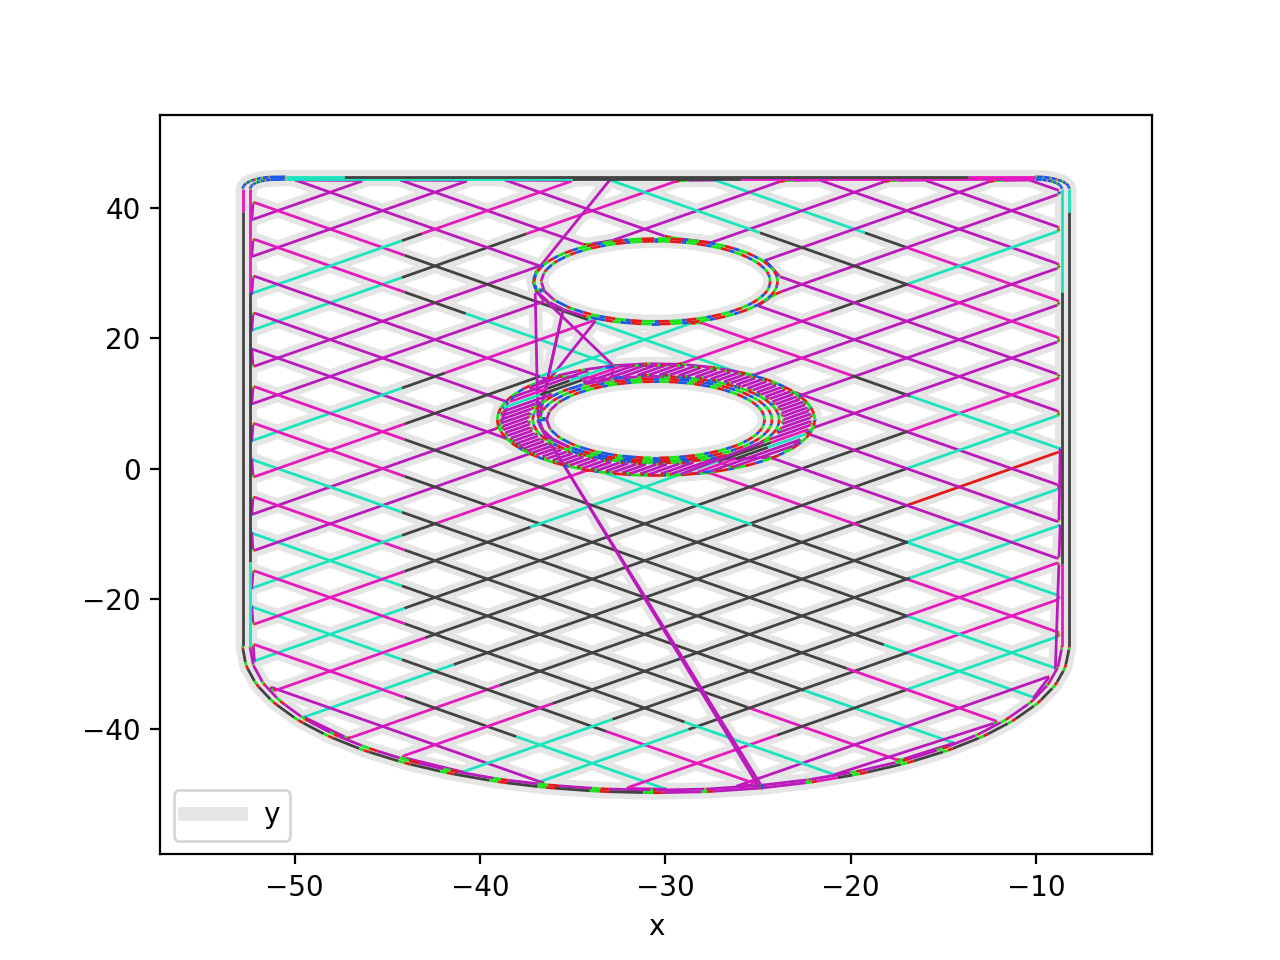

,x,y
0,-8.760,2.553
1,-49.443,-38.129
2,-49.513,-38.199
3,-49.484,-38.184
4,-47.111,-41.454
5,-8.760,-3.103
6,-8.760,-2.553
7,-23.106,11.792
8,-22.804,11.136
9,-8.760,25.180


,x0,y0,vx0,vy0,ax0,ay0,x1,y1,vx1,vy1,ax1,ay1,dt,src_idx,src_part,seg_type,t,src_de,de
0,-8.760000,2.553000,0.000000,0.000000,-1000.000000,-999.975420,-16.860199,-5.547000,-127.280785,-127.277656,-1000.000000,-999.975420,0.127281,1,0.199105,start,0.127281,-2.87037,-0.571506
1,-16.860199,-5.547000,-127.280785,-127.277656,0.000000,0.000000,-41.412073,-30.098271,-127.280785,-127.277656,0.000000,0.000000,0.192895,1,0.603492,long_plato_main,0.320176,-2.87037,-1.732246
2,-41.412073,-30.098271,-127.280785,-127.277656,1000.000000,999.975420,-49.443000,-38.129000,-11.770440,-11.770295,1000.000000,999.975420,0.115510,1,0.197403,long_plato_out,0.435686,-2.87037,-0.566618
3,-49.443000,-38.129000,-11.770440,-11.770295,990.091903,990.091903,-49.512957,-38.198972,0.126766,0.025101,990.091903,990.091903,0.012013,2,1.000000,short_plato,0.447700,0.00000,0.000000
4,-49.512957,-38.198972,0.126766,0.025101,675.814056,349.558995,-49.498248,-38.191370,4.466430,2.310222,675.814056,349.558995,0.006280,3,0.508689,short_plato,0.453980,0.00000,0.000000
5,-49.498248,-38.191370,4.466430,2.310222,-237.147340,-1000.000000,-49.485207,-38.189088,3.709925,-0.879799,-237.147340,-1000.000000,0.003190,3,0.491311,end,0.457170,0.00000,0.000000
6,-49.485207,-38.189088,3.709925,-0.879799,-237.147340,-1000.000000,-49.474579,-38.196983,2.953420,-4.069820,-237.147340,-1000.000000,0.003190,4,0.003970,start,0.460360,0.00000,0.000000
7,-49.474579,-38.196983,2.953420,-4.069820,44.179339,-60.879241,-47.309061,-41.181071,14.144432,-19.491063,44.179339,-60.879241,0.253309,4,0.912565,middle_plato,0.713669,0.00000,0.000000
8,-47.309061,-41.181071,14.144432,-19.491063,-201.031322,1000.000000,-47.130709,-41.355961,11.329440,-5.488308,-201.031322,1000.000000,0.014003,4,0.083464,end,0.727671,0.00000,0.000000
9,-47.130709,-41.355961,11.329440,-5.488308,-201.031322,1000.000000,-46.991774,-41.334774,8.514447,8.514447,-201.031322,1000.000000,0.014003,5,0.003109,start,0.741674,-2.70587,-0.008412


,x,y
609,-34.385,13.131
610,-34.145,15.069
611,-38.122,11.091
612,-38.192,11.021
613,-38.427,10.221
614,-33.205,15.443
615,-33.135,15.513
616,-32.399,15.683
617,-38.712,9.370
618,-38.782,9.300


,x0,y0,vx0,vy0,ax0,ay0,x1,y1,vx1,vy1,ax1,ay1,dt,src_idx,src_part,seg_type,t,src_de,de
1721,-33.205000,15.443000,11.695035,11.695035,-989.928954,-989.928954,-33.136182,15.511818,0.723854,0.723854,-989.928954,-989.928954,0.011083,615,0.983114,short_plato,106.239312,0.00000,0.000000
1722,-33.136182,15.511818,0.723854,0.723854,1000.000000,60.529089,-33.133667,15.513081,2.356774,0.822693,1000.000000,60.529089,0.001633,615,0.016886,end,106.240945,0.00000,0.000000
1723,-33.133667,15.513081,2.356774,0.822693,1000.000000,60.529089,-33.128485,15.514505,3.989694,0.921533,1000.000000,60.529089,0.001633,616,0.008852,start,106.242578,0.00000,0.000000
1724,-33.128485,15.514505,3.989694,0.921533,640.775758,148.005270,-32.718656,15.609166,23.262293,5.373084,640.775758,148.005270,0.030077,616,0.556833,short_plato,106.272655,0.00000,0.000000
1725,-32.718656,15.609166,23.262293,5.373084,-1000.000000,-349.076060,-32.493413,15.650043,9.520896,0.576291,-1000.000000,-349.076060,0.013741,616,0.434316,end,106.286396,0.00000,0.000000
1726,-32.493413,15.650043,9.520896,0.576291,-1000.000000,-349.076060,-32.456996,15.625004,-4.220502,-4.220502,-1000.000000,-349.076060,0.013741,617,0.009187,start,106.300138,-0.44541,-0.004092
1727,-32.456996,15.625004,-4.220502,-4.220502,-1000.000000,-1000.000000,-34.473089,13.608911,-63.639610,-63.639610,-1000.000000,-1000.000000,0.059419,617,0.319356,long_plato_in,106.359557,-0.44541,-0.142244
1728,-34.473089,13.608911,-63.639610,-63.639610,0.000000,0.000000,-36.756307,11.325693,-63.639610,-63.639610,0.000000,0.000000,0.035877,617,0.361669,long_plato_main,106.395434,-0.44541,-0.161091
1729,-36.756307,11.325693,-63.639610,-63.639610,1000.000000,1000.000000,-38.712000,9.370000,-11.773439,-11.773439,1000.000000,1000.000000,0.051866,617,0.309788,long_plato_out,106.447300,-0.44541,-0.137983
1730,-38.712000,9.370000,-11.773439,-11.773439,990.099010,990.099010,-38.782000,9.300000,0.000000,0.000000,990.099010,990.099010,0.011891,618,1.000000,short_plato,106.459191,0.00000,0.000000


In [4]:
%matplotlib notebook

from matplotlib.collections import LineCollection
import warnings

warnings.simplefilter("error")

all_segments = path_planning.build_segments(path, plato_slowdowns)

lines = []
colors = []

i = 0
for index, row in all_segments.iterrows():
    i += 1
    lines.append(((row['x0'], row['y0']), (row['x1'], row['y1'])))
    st = row["seg_type"]
    if st == "start":
        colors.append((1,0,0,1))
    elif st == "end":
        colors.append((0,1,0,1))
    elif st == "short_plato":
        colors.append((0,0.3,1,1))
    elif st == "middle_plato":
        colors.append((0.8,0,0.8,1))
    elif st == "long_plato_main":
        colors.append((0.2,0.2,0.2,1))
    elif st == "long_plato_in":
        colors.append((1,0,0.8,1))
    elif st == "long_plato_out":
        colors.append((0,1,0.8,1))
    else:
        colors.append((1,1,0,1))
    
lc = LineCollection(lines, colors=colors, linewidths=1)
fig, ax = plt.subplots()

ax.add_collection(lc)

#path.iloc[limit:].plot(x="px", y="py", linewidth=3, color=(0.5, 0.5, 0.5, 0.2), ax=ax)
full_path = pd.DataFrame()
full_path["x"] = path["px"]
full_path["y"] = path["py"]
last_x = path["x"].iloc[-1]
last_y = path["y"].iloc[-1]
full_path = full_path.append({"x": last_x, "y": last_y}, ignore_index=True)
full_path.plot(x="x", y="y", linewidth=5, color=(0.5, 0.5, 0.5, 0.2), ax=ax)
    
ax.autoscale()
ax.margins(0.1)
display(full_path.iloc[:10])
display(all_segments.iloc[:10])

display(full_path.iloc[-10:])
display(all_segments.iloc[-10:])


In [5]:
all_segments["test_vx1"] = all_segments["vx0"] + all_segments["dt"] * all_segments["ax0"]
all_segments["test_vy1"] = all_segments["vy0"] + all_segments["dt"] * all_segments["ay0"]
all_segments["test_x1"] = all_segments["x0"] + all_segments["dt"] * all_segments["vx0"] + all_segments["dt"] * all_segments["dt"] * all_segments["ax0"]/2
all_segments["test_y1"] = all_segments["y0"] + all_segments["dt"] * all_segments["vy0"] + all_segments["dt"] * all_segments["dt"] * all_segments["ay0"]/2
print("bad vx1")
display(all_segments[abs(all_segments["test_vx1"] - all_segments["vx1"]) > 0.01])
print("bad vy1")
display(all_segments[abs(all_segments["test_vy1"] - all_segments["vy1"]) > 0.01])
print("bad x1")
display(all_segments[abs(all_segments["test_x1"] - all_segments["x1"]) > 0.0001])
print("bad y1")
display(all_segments[abs(all_segments["test_y1"] - all_segments["y1"]) > 0.0001])
print("ax non continuous")
display(all_segments[abs(all_segments["ax1"] - all_segments["ax0"]) > 0.001])
print("ay non continuous")
display(all_segments[abs(all_segments["ay1"] - all_segments["ay0"]) > 0.001])
print("vx non continuous")
display(all_segments[abs(all_segments["vx1"] - all_segments["vx0"].shift(-1)) > 0.001])
print("vy non continuous")
display(all_segments[abs(all_segments["vy1"] - all_segments["vy0"].shift(-1)) > 0.001])
print("x non continuous")
display(all_segments[abs(all_segments["x1"] - all_segments["x0"].shift(-1)) > 0.001])
print("y non continuous")
display(all_segments[abs(all_segments["y1"] - all_segments["y0"].shift(-1)) > 0.001])
print("src_part groups")
display(np.bincount(all_segments["src_idx"], weights=all_segments["src_part"]))
display(all_segments[np.isnan(all_segments["dt"])][["seg_type", "vx0", "vx1", "vy0", "vy1"]])


bad vx1


,x0,y0,vx0,vy0,ax0,ay0,x1,y1,vx1,vy1,...,src_idx,src_part,seg_type,t,src_de,de,test_vx1,test_vy1,test_x1,test_y1
4,-49.512957,-38.198972,0.126766,0.025101,675.814056,349.558995,-49.498248,-38.191370,4.466430,2.310222,...,3,0.508689,short_plato,0.453980,0.0,0.0,4.370984,2.220386,-49.498833,-38.191921
33,-27.269000,44.240000,-11.772172,11.772490,990.096606,-990.096606,-27.338996,44.309986,-0.044442,-0.081259,...,12,1.000000,short_plato,4.681600,0.0,0.0,0.079890,-0.079572,-27.338982,44.309986
34,-27.338996,44.309986,-0.044442,-0.081259,0.000000,-779.316558,-27.339000,44.304378,0.000000,-2.959669,...,13,0.562230,short_plato,4.685246,0.0,0.0,-0.044442,-2.922121,-27.339158,44.304511
43,-52.239000,21.299000,-11.754693,-11.754693,990.056605,990.056605,-52.308920,21.229286,-0.182929,0.360883,...,16,1.000000,short_plato,5.071359,0.0,0.0,0.353368,0.353368,-52.308717,21.229283
44,-52.308920,21.229286,-0.182929,0.360883,2.261674,86.803696,-52.245483,23.666801,0.536709,20.599050,...,17,0.894606,middle_plato,5.296556,0.0,0.0,0.326393,19.908822,-52.292766,23.511625
48,-38.550000,10.265000,11.761648,-11.762077,-990.056193,990.056193,-38.480099,10.194865,0.193166,-1.094781,...,19,1.000000,short_plato,6.762919,0.0,0.0,0.059532,-0.059961,-38.480139,10.195134
49,-38.480099,10.194865,0.193166,-1.094781,-32.018909,-274.356712,-38.864056,6.904186,-4.962190,-42.518945,...,20,0.849681,middle_plato,6.912530,0.0,0.0,-4.597221,-42.141614,-38.809547,6.960541
53,-52.239000,-6.984000,-11.754694,-11.754252,990.056237,990.056237,-52.308920,-7.053714,-0.182926,0.360876,...,22,1.000000,short_plato,7.926458,0.0,0.0,0.353359,0.353800,-52.308717,-7.053712
54,-52.308920,-7.053714,-0.182926,0.360876,2.261699,86.804658,-52.245483,-4.616200,0.536712,20.599158,...,23,0.894606,middle_plato,8.151654,0.0,0.0,0.326400,19.908943,-52.292765,-4.771373
61,-14.391045,-42.176961,-0.113421,0.070658,-549.742566,436.002725,-14.406207,-42.164939,-4.093222,3.246349,...,26,0.524381,short_plato,8.603520,0.0,0.0,-3.958163,3.119936,-14.405283,-42.165804


bad vy1


,x0,y0,vx0,vy0,ax0,ay0,x1,y1,vx1,vy1,...,src_idx,src_part,seg_type,t,src_de,de,test_vx1,test_vy1,test_x1,test_y1
3,-49.443000,-38.129000,-11.770440,-11.770295,990.091903,990.091903,-49.512957,-38.198972,0.126766,0.025101,...,2,1.000000,short_plato,0.447700,0.0,0.0,0.123848,0.123993,-49.512957,-38.198955
4,-49.512957,-38.198972,0.126766,0.025101,675.814056,349.558995,-49.498248,-38.191370,4.466430,2.310222,...,3,0.508689,short_plato,0.453980,0.0,0.0,4.370984,2.220386,-49.498833,-38.191921
34,-27.338996,44.309986,-0.044442,-0.081259,0.000000,-779.316558,-27.339000,44.304378,0.000000,-2.959669,...,13,0.562230,short_plato,4.685246,0.0,0.0,-0.044442,-2.922121,-27.339158,44.304511
44,-52.308920,21.229286,-0.182929,0.360883,2.261674,86.803696,-52.245483,23.666801,0.536709,20.599050,...,17,0.894606,middle_plato,5.296556,0.0,0.0,0.326393,19.908822,-52.292766,23.511625
48,-38.550000,10.265000,11.761648,-11.762077,-990.056193,990.056193,-38.480099,10.194865,0.193166,-1.094781,...,19,1.000000,short_plato,6.762919,0.0,0.0,0.059532,-0.059961,-38.480139,10.195134
49,-38.480099,10.194865,0.193166,-1.094781,-32.018909,-274.356712,-38.864056,6.904186,-4.962190,-42.518945,...,20,0.849681,middle_plato,6.912530,0.0,0.0,-4.597221,-42.141614,-38.809547,6.960541
54,-52.308920,-7.053714,-0.182926,0.360876,2.261699,86.804658,-52.245483,-4.616200,0.536712,20.599158,...,23,0.894606,middle_plato,8.151654,0.0,0.0,0.326400,19.908943,-52.292765,-4.771373
60,-14.461000,-42.107000,11.770008,-11.770164,-990.090959,990.090959,-14.391045,-42.176961,-0.113421,0.070658,...,25,1.000000,short_plato,8.596526,0.0,0.0,-0.110604,0.110448,-14.391046,-42.176955
61,-14.391045,-42.176961,-0.113421,0.070658,-549.742566,436.002725,-14.406207,-42.164939,-4.093222,3.246349,...,26,0.524381,short_plato,8.603520,0.0,0.0,-3.958163,3.119936,-14.405283,-42.165804
71,-52.307920,-9.916286,-0.183337,-0.360891,2.197757,-86.795475,-52.246271,-12.353832,0.521569,-20.598205,...,30,0.894617,middle_plato,9.481043,0.0,0.0,0.311616,-19.907966,-52.293475,-12.198645


bad x1


,x0,y0,vx0,vy0,ax0,ay0,x1,y1,vx1,vy1,...,src_idx,src_part,seg_type,t,src_de,de,test_vx1,test_vy1,test_x1,test_y1
4,-49.512957,-38.198972,0.126766,0.025101,675.814056,349.558995,-49.498248,-38.191370,4.466430,2.310222,...,3,0.508689,short_plato,0.453980,0.0,0.0,4.370984,2.220386,-49.498833,-38.191921
34,-27.338996,44.309986,-0.044442,-0.081259,0.000000,-779.316558,-27.339000,44.304378,0.000000,-2.959669,...,13,0.562230,short_plato,4.685246,0.0,0.0,-0.044442,-2.922121,-27.339158,44.304511
43,-52.239000,21.299000,-11.754693,-11.754693,990.056605,990.056605,-52.308920,21.229286,-0.182929,0.360883,...,16,1.000000,short_plato,5.071359,0.0,0.0,0.353368,0.353368,-52.308717,21.229283
44,-52.308920,21.229286,-0.182929,0.360883,2.261674,86.803696,-52.245483,23.666801,0.536709,20.599050,...,17,0.894606,middle_plato,5.296556,0.0,0.0,0.326393,19.908822,-52.292766,23.511625
49,-38.480099,10.194865,0.193166,-1.094781,-32.018909,-274.356712,-38.864056,6.904186,-4.962190,-42.518945,...,20,0.849681,middle_plato,6.912530,0.0,0.0,-4.597221,-42.141614,-38.809547,6.960541
53,-52.239000,-6.984000,-11.754694,-11.754252,990.056237,990.056237,-52.308920,-7.053714,-0.182926,0.360876,...,22,1.000000,short_plato,7.926458,0.0,0.0,0.353359,0.353800,-52.308717,-7.053712
54,-52.308920,-7.053714,-0.182926,0.360876,2.261699,86.804658,-52.245483,-4.616200,0.536712,20.599158,...,23,0.894606,middle_plato,8.151654,0.0,0.0,0.326400,19.908943,-52.292765,-4.771373
61,-14.391045,-42.176961,-0.113421,0.070658,-549.742566,436.002725,-14.406207,-42.164939,-4.093222,3.246349,...,26,0.524381,short_plato,8.603520,0.0,0.0,-3.958163,3.119936,-14.405283,-42.165804
70,-52.238000,-9.986000,-11.754693,11.754693,990.056605,-990.056605,-52.307920,-9.916286,-0.183337,-0.360891,...,29,1.000000,short_plato,9.255835,0.0,0.0,0.353376,-0.353376,-52.307717,-9.916283
71,-52.307920,-9.916286,-0.183337,-0.360891,2.197757,-86.795475,-52.246271,-12.353832,0.521569,-20.598205,...,30,0.894617,middle_plato,9.481043,0.0,0.0,0.311616,-19.907966,-52.293475,-12.198645


bad y1


,x0,y0,vx0,vy0,ax0,ay0,x1,y1,vx1,vy1,...,src_idx,src_part,seg_type,t,src_de,de,test_vx1,test_vy1,test_x1,test_y1
4,-49.512957,-38.198972,0.126766,0.025101,675.814056,349.558995,-49.498248,-38.191370,4.466430,2.310222,...,3,0.508689,short_plato,0.453980,0.0,0.0,4.370984,2.220386,-49.498833,-38.191921
34,-27.338996,44.309986,-0.044442,-0.081259,0.000000,-779.316558,-27.339000,44.304378,0.000000,-2.959669,...,13,0.562230,short_plato,4.685246,0.0,0.0,-0.044442,-2.922121,-27.339158,44.304511
44,-52.308920,21.229286,-0.182929,0.360883,2.261674,86.803696,-52.245483,23.666801,0.536709,20.599050,...,17,0.894606,middle_plato,5.296556,0.0,0.0,0.326393,19.908822,-52.292766,23.511625
48,-38.550000,10.265000,11.761648,-11.762077,-990.056193,990.056193,-38.480099,10.194865,0.193166,-1.094781,...,19,1.000000,short_plato,6.762919,0.0,0.0,0.059532,-0.059961,-38.480139,10.195134
49,-38.480099,10.194865,0.193166,-1.094781,-32.018909,-274.356712,-38.864056,6.904186,-4.962190,-42.518945,...,20,0.849681,middle_plato,6.912530,0.0,0.0,-4.597221,-42.141614,-38.809547,6.960541
54,-52.308920,-7.053714,-0.182926,0.360876,2.261699,86.804658,-52.245483,-4.616200,0.536712,20.599158,...,23,0.894606,middle_plato,8.151654,0.0,0.0,0.326400,19.908943,-52.292765,-4.771373
61,-14.391045,-42.176961,-0.113421,0.070658,-549.742566,436.002725,-14.406207,-42.164939,-4.093222,3.246349,...,26,0.524381,short_plato,8.603520,0.0,0.0,-3.958163,3.119936,-14.405283,-42.165804
71,-52.307920,-9.916286,-0.183337,-0.360891,2.197757,-86.795475,-52.246271,-12.353832,0.521569,-20.598205,...,30,0.894617,middle_plato,9.481043,0.0,0.0,0.311616,-19.907966,-52.293475,-12.198645
75,-37.297000,2.300000,11.758558,11.758165,-990.056249,-990.056249,-37.227180,2.370108,-0.103490,0.857320,...,32,1.000000,short_plato,11.079451,0.0,0.0,-0.097514,-0.097908,-37.227179,2.369817
76,-37.227180,2.370108,-0.103490,0.857320,-417.148707,721.132968,-38.108071,3.893124,-27.114909,46.874062,...,33,0.700932,middle_plato,11.143364,0.0,0.0,-26.764772,46.947190,-38.085798,3.897776


ax non continuous


,x0,y0,vx0,vy0,ax0,ay0,x1,y1,vx1,vy1,...,src_idx,src_part,seg_type,t,src_de,de,test_vx1,test_vy1,test_x1,test_y1


ay non continuous


,x0,y0,vx0,vy0,ax0,ay0,x1,y1,vx1,vy1,...,src_idx,src_part,seg_type,t,src_de,de,test_vx1,test_vy1,test_x1,test_y1


vx non continuous


,x0,y0,vx0,vy0,ax0,ay0,x1,y1,vx1,vy1,...,src_idx,src_part,seg_type,t,src_de,de,test_vx1,test_vy1,test_x1,test_y1


vy non continuous


,x0,y0,vx0,vy0,ax0,ay0,x1,y1,vx1,vy1,...,src_idx,src_part,seg_type,t,src_de,de,test_vx1,test_vy1,test_x1,test_y1


x non continuous


,x0,y0,vx0,vy0,ax0,ay0,x1,y1,vx1,vy1,...,src_idx,src_part,seg_type,t,src_de,de,test_vx1,test_vy1,test_x1,test_y1


y non continuous


,x0,y0,vx0,vy0,ax0,ay0,x1,y1,vx1,vy1,...,src_idx,src_part,seg_type,t,src_de,de,test_vx1,test_vy1,test_x1,test_y1


src_part groups


array([0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

,seg_type,vx0,vx1,vy0,vy1


In [ ]:
sub_path = pd.DataFrame()
sub_path["src_idx"] = path["src_idx"]
sub_path["src_de"] = path["de"]
all_segments_extras = all_segments.merge(sub_path, on='src_idx')
all_segments_extras["de"] = all_segments_extras["src_de"] * all_segments_extras["src_part"]
all_segments_extras["de_v"] = all_segments_extras["de"] / all_segments_extras["dt"]
all_segments_extras.loc[abs(all_segments_extras["de"]) < 0.001, 'de_v' ] = 0
all_segments_extras["v0"] = np.linalg.norm(all_segments_extras[['vx0', 'vy0']].values, axis=1)
all_segments_extras["v1"] = np.linalg.norm(all_segments_extras[['vx1', 'vy1']].values, axis=1)
all_segments_extras["avg_v"] = (all_segments_extras["v0"] + all_segments_extras["v1"])/2
all_segments_extras["de_v0"] = all_segments_extras["de_v"] / all_segments_extras["avg_v"] * all_segments_extras["v0"]
all_segments_extras["de_v1"] = all_segments_extras["de_v"] / all_segments_extras["avg_v"] * all_segments_extras["v1"]
all_segments_extras["de_a"] = (all_segments_extras["de_v1"] - all_segments_extras["de_v0"])/ all_segments_extras["dt"]
all_segments_extras.loc[abs(all_segments_extras["de"]) < 0.001, "de_v0"] = 0
all_segments_extras.loc[abs(all_segments_extras["de"]) < 0.001, "de_v1"] = 0
all_segments_extras.loc[abs(all_segments_extras["de"]) < 0.001, "de_a"] = 0

acc_step = 10000
v_step = 50000000
v_mult = v_step / acc_step
spm = 80

delta_e = all_segments_extras["de_v1"] - all_segments_extras["de_v0"].shift(-1)
all_segments_extras["delta_ve"] = delta_e
all_segments_extras["int_dt"] = (all_segments_extras["dt"] * acc_step).fillna(0).astype(int)
all_segments_extras["int_vx0"] = (all_segments_extras["vx0"] * 2 ** 32 * spm / v_step).fillna(0).astype(int)
all_segments_extras["int_vy0"] = (all_segments_extras["vy0"] * 2 ** 32 * spm / v_step).fillna(0).astype(int)
all_segments_extras["int_vx1"] = (all_segments_extras["vx1"] * 2 ** 32 * spm / v_step).fillna(0).astype(int)
all_segments_extras["int_vy1"] = (all_segments_extras["vy1"] * 2 ** 32 * spm / v_step).fillna(0).astype(int)
all_segments_extras["int_ax"] = (np.around((all_segments_extras["int_vx1"] - all_segments_extras["int_vx0"]) / all_segments_extras["int_dt"])).replace([np.inf, -np.inf], np.nan).fillna(0).astype(int) 
all_segments_extras["int_ay"] = (np.around((all_segments_extras["int_vy1"] - all_segments_extras["int_vy0"]) / all_segments_extras["int_dt"])).replace([np.inf, -np.inf], np.nan).fillna(0).astype(int) 
#all_segments_extras["int_vx1_real1"] = (all_segments_extras["int_vx0"] + (all_segments_extras["int_ax"]-1) * all_segments_extras["int_dt"]).fillna(0).astype(int)
all_segments_extras["int_vx1_real"] = (
    all_segments_extras["int_vx0"] + all_segments_extras["int_ax"] * all_segments_extras["int_dt"]
).fillna(0).astype(int)
#all_segments_extras["int_vx1_real3"] = (all_segments_extras["int_vx0"] + (all_segments_extras["int_ax"]+1) * all_segments_extras["int_dt"]).fillna(0).astype(int)
#all_segments_extras["int_vy1_real1"] = (all_segments_extras["int_vy0"] + (all_segments_extras["int_ay"]-1) * all_segments_extras["int_dt"]).fillna(0).astype(int)
all_segments_extras["int_vy1_real"] = (
    all_segments_extras["int_vy0"] + all_segments_extras["int_ay"] * all_segments_extras["int_dt"]
).fillna(0).astype(int)
#all_segments_extras["int_vy1_real3"] = (all_segments_extras["int_vy0"] + (all_segments_extras["int_ay"]+1) * all_segments_extras["int_dt"]).fillna(0).astype(int)
all_segments_extras["int_dx"] = ((all_segments_extras["int_vx0"] + all_segments_extras["int_vx1_real"]) / 2 * all_segments_extras["int_dt"] * v_mult).fillna(0).astype(int)
all_segments_extras["int_dy"] = ((all_segments_extras["int_vy0"] + all_segments_extras["int_vy1_real"]) / 2 * all_segments_extras["int_dt"] * v_mult).fillna(0).astype(int)
all_segments_extras["real_dx"] = all_segments_extras["int_dx"] / spm / 2.0 ** 32
all_segments_extras["exp_dx"] = all_segments_extras["x1"] - all_segments_extras["x0"]
all_segments_extras["real_dy"] = all_segments_extras["int_dy"] / spm / 2.0 ** 32
all_segments_extras["exp_dy"] = all_segments_extras["y1"] - all_segments_extras["y0"]
all_segments_extras["error"] = np.linalg.norm([
    all_segments_extras["real_dx"] - all_segments_extras["exp_dx"],
    all_segments_extras["real_dy"] - all_segments_extras["exp_dy"],
], axis = 0)

#display(all_segments_extras[all_segments_extras["error"]>0.02])
display(all_segments_extras[np.logical_and(all_segments_extras["dt"] > -1e-27,all_segments_extras["dt"] < 1e-4)][["seg_type","dt", "vx0", "vx1", "vy0", "vy1", "exp_dx", "exp_dy"]])


In [14]:
from valurap.asg import ProfileSegment
from numpy.linalg import norm

def format(all_segments, apgs=None, acc_step=1000):
    if apgs is None:
        apgs = {}

    apg_states = {}
    
    apg_x = apgs.get("X", path_planning.FakeApg("X"))
    apg_y = apgs.get("Y", path_planning.FakeApg("Y"))
    apg_z = apgs.get("Z", path_planning.FakeApg("Z"))

    v_step = 50000000
    v_mult = v_step / acc_step
    spm = 80
    spme = 837

    pr_opt = []
    first_row = all_segments.iloc[0]
    last_x = first_row["x0"]
    last_y = first_row["y0"]
    last_vx = first_row["vx0"]
    last_vy = first_row["vy0"]
    assert last_vx == 0
    assert last_vy == 0
    segs = [
        ProfileSegment(
            apg=apg_x, x = last_x * spm, v = 0, a = 0
        ),
        ProfileSegment(
            apg=apg_y, x = last_y * spm, v = 0, a = 0
        ),
    ]
    
    sub_profile = [[5, segs]]
    pr_opt += sub_profile
    
    path_planning.emulate(sub_profile, apg_states=apg_states, accel_step=50000000/acc_step)
    print(apg_states["X"], apg_states["Y"])
    
    for index, row in all_segments.iterrows():
        if index > 550000000:
            print("last_x:", last_x, "last_y:", last_y)
            print("last_vx:", last_vx, "last_vy:", last_vy)
            break
        print("index:", index)
        next_x = row["x1"]
        next_y = row["y1"]
        next_vx = row["vx1"]
        next_vy = row["vy1"]
        de = row["de"]

        dx = next_x - last_x
        dy = next_y - last_y
        dvx = next_vx - last_vx
        dvy = next_vy - last_vy
        avg_vx = last_vx + 0.5 * dvx
        avg_vy = last_vy + 0.5 * dvy
        
        print("x:", last_x, row["x0"])
        print("y:", last_y, row["y0"])
        print("vx:", last_vx, row["vx0"])
        print("vy:", last_vy, row["vy0"])
        print("dx:", dx)
        print("dy:", dy)
        print("dvx:", dvx)
        print("dvy:", dvy)

        dt = row["dt"]
        int_dt = np.around(dt * acc_step)
        
        if int_dt == 0:
            int_dt = 1

        print("int_dt:", int_dt)

        int_vx0 = np.around(last_vx * 2 ** 32 * spm / v_step)
        int_vy0 = np.around(last_vy * 2 ** 32 * spm / v_step)
        int_vx1 = np.around(next_vx * 2 ** 32 * spm / v_step)
        int_vy1 = np.around(next_vy * 2 ** 32 * spm / v_step)
        int_ax = np.around((int_vx1 - int_vx0) / int_dt * 65536)
        int_ay = np.around((int_vy1 - int_vy0) / int_dt * 65536)
        print("int_vx1:", int_vx1, "int_vy1:", int_vy1)

        real_dx = path_planning.int_x(int_dt, int_vx0 * 65536, int_ax, 0, 0) / 65536 * v_mult
        real_dy = path_planning.int_x(int_dt, int_vy0 * 65536, int_ay, 0, 0) / 65536 * v_mult
        x_error = dx * 2.0 ** 32 * spm - real_dx 
        
        int_jx = np.around(-12 * x_error / int_dt / int_dt / int_dt * 65536 / v_mult)
        int_ax = np.around(int_ax - int_jx * int_dt / 2)
        print("x_error:", x_error / 2.0 ** 32 / spm, "int_jx:", int_jx, "int_ax:", int_ax)

        y_error = dy * 2.0 ** 32 * spm - real_dy 
        int_jy = np.around(-12 * y_error / int_dt / int_dt / int_dt * 65536 / v_mult)
        int_ay = np.around(int_ay - int_jy * int_dt / 2)
        print("y_error:", y_error / 2.0 ** 32 / spm, "int_jy:", int_jy, "int_ay:", int_ay)

        segs = [
                ProfileSegment(
                    apg=apg_x, a = int(int_ax), j = int(int_jx)
                ),
                ProfileSegment(
                    apg=apg_y, a = int(int_ay), j = int(int_jy)
                ),
            ]
        
        sub_profile = [[int(int_dt), segs]]
        pr_opt += sub_profile
    
        res = path_planning.emulate(sub_profile, apg_states=apg_states, accel_step=50000000/acc_step)
        res["xv"] = res["X_v"] * 65536 / 2**32 / 80 * 50000000
        res["yv"] = res["Y_v"] * 65536 / 2**32 / 80 * 50000000
        
        print("ApgStates:", apg_states["X"].x / 2**32 / spm, apg_states["Y"].x / 2**32 / spm)
        print("        V:", apg_states["X"].v / 2**32 / spm * v_step, apg_states["Y"].v / 2**32 / spm * v_step)
        print("   max_xv:", res["xv"].max(), res["xv"].min())
        print("   max_yv:", res["yv"].max(), res["yv"].min())

        if 0:
            last_x += path_planning.int_x(int_dt, int_vx0 * 65536, int_ax, int_jx, 0) / 65536 / 2 ** 32 / spm * v_mult
            last_y += path_planning.int_x(int_dt, int_vy0 * 65536, int_ay, int_jy, 0) / 65536 / 2 ** 32 / spm * v_mult
            last_vx = path_planning.int_v(int_dt, int_vx0 * 65536, int_ax, int_jx, 0) / 65536 / 2 ** 32 / spm * v_step
            last_vy = path_planning.int_v(int_dt, int_vy0 * 65536, int_ay, int_jy, 0) / 65536 / 2 ** 32 / spm * v_step
        else:
            last_x = apg_states["X"].x / 2**32 / spm
            last_y = apg_states["Y"].x / 2**32 / spm
            last_vx = apg_states["X"].v / 2**32 / spm * v_step
            last_vy = apg_states["Y"].v / 2**32 / spm * v_step
            
        print("final x_error:", last_x - next_x)
        print("final y_error:", last_y - next_y)
        print("final vx_error:", last_vx - next_vx)
        print("final vy_error:", last_vy - next_vy)

        if 1:
            assert res["xv"].max() < 300
            assert res["xv"].min() > -300
            assert res["yv"].max() < 300
            assert res["yv"].min() > -300

            assert abs(last_x - next_x) < 1
            assert abs(last_y - next_y) < 1
        
        if abs(last_vx) < 0.001:
            last_vx = 0
        if abs(last_vy) < 0.001:
            last_vy = 0
        
    pr_opt += [
        [
            5,
            [
                ProfileSegment(apg=apg_x, v=0),
                ProfileSegment(apg=apg_y, v=0),
                ProfileSegment(apg=apg_z, v=0),
            ],
        ]
    ]

    return pr_opt


acc_step = 10000
pr_opt = format(all_segments, acc_step=acc_step)
display(pr_opt)
res = path_planning.emulate(pr_opt, accel_step=50000000/acc_step, verbose=0)



<ApgState x=-3009913081036.84 v=0 a=0 j=0 jj=0> <ApgState x=877204120535.0012 v=0 a=0 j=0 jj=0>
index: 0
x: -8.760000000000115 -8.760000000000115
y: 2.552999999999887 2.552999999999887
vx: 0.0 0.0
vy: 0.0 0.0
dx: -8.1001991028083
dy: -8.099999997552967
dvx: -127.28078490336476
dvy: -127.27765630456663
int_dt: 1273.0
int_vx1: -874667.0 int_vy1: -874645.0
x_error: -0.005140173824867133 int_jx: 135.0 int_ax: -45115132.0
y_error: -0.005144751978339457 int_jy: 135.0 int_ay: -45113998.0
ApgStates: -16.85470856620476 -5.541483258901277
        V: -127.19086953438817 -127.18708603642881
   max_xv: 0.0 -127.09118891507386
   max_yv: 0.0 -127.0874054171145
final x_error: 0.005490536603655727
final y_error: 0.0055167386518029105
final vx_error: 0.08991536897659103
final vy_error: 0.09057026813782443
index: 1
x: -16.85470856620476 -16.860199102808416
y: -5.541483258901277 -5.54699999755308
vx: -127.19086953438817 -127.28078490336476
vy: -127.18708603642881 -127.27765630456663
dx: -24.5573648071944

ApgStates: -8.861114041172083 -3.204099352195044
        V: 10.176736395806074 10.177027434110641
   max_xv: 127.15812772512434 10.277290130034089
   max_yv: 127.15478078462185 10.277581168338656
final x_error: -0.004850923426017673
final y_error: -0.004836234448982513
final vx_error: -0.08465213584491593
final vy_error: -0.0843610975403486
index: 13
x: -8.861114041172083 -8.856263117746066
y: -3.204099352195044 -3.1992631177460615
vx: 10.176736395806074 10.26138853165099
vy: 10.177027434110641 10.26138853165099
dx: 0.07704826173548263
dy: 0.14510187609477043
dvx: -5.046042129980579
dvy: 9.465461661955423
int_dt: 94.0
int_vx1: 35258.0 int_vy1: 134982.0
x_error: 0.004850942411641412 int_jx: -315634.0 int_ax: -9341014.0
y_error: 0.005423527518015447 int_jy: -352890.0 int_ay: 61935348.0
ApgStates: -8.78394466719136 -3.0588594802684383
        V: 5.156907718628645 19.672297639772296
   max_xv: 10.176736395806074 5.242909537628293
   max_yv: 19.607687136158347 10.177027434110641
final x_err

AssertionError: 

<IPython.core.display.Javascript object>


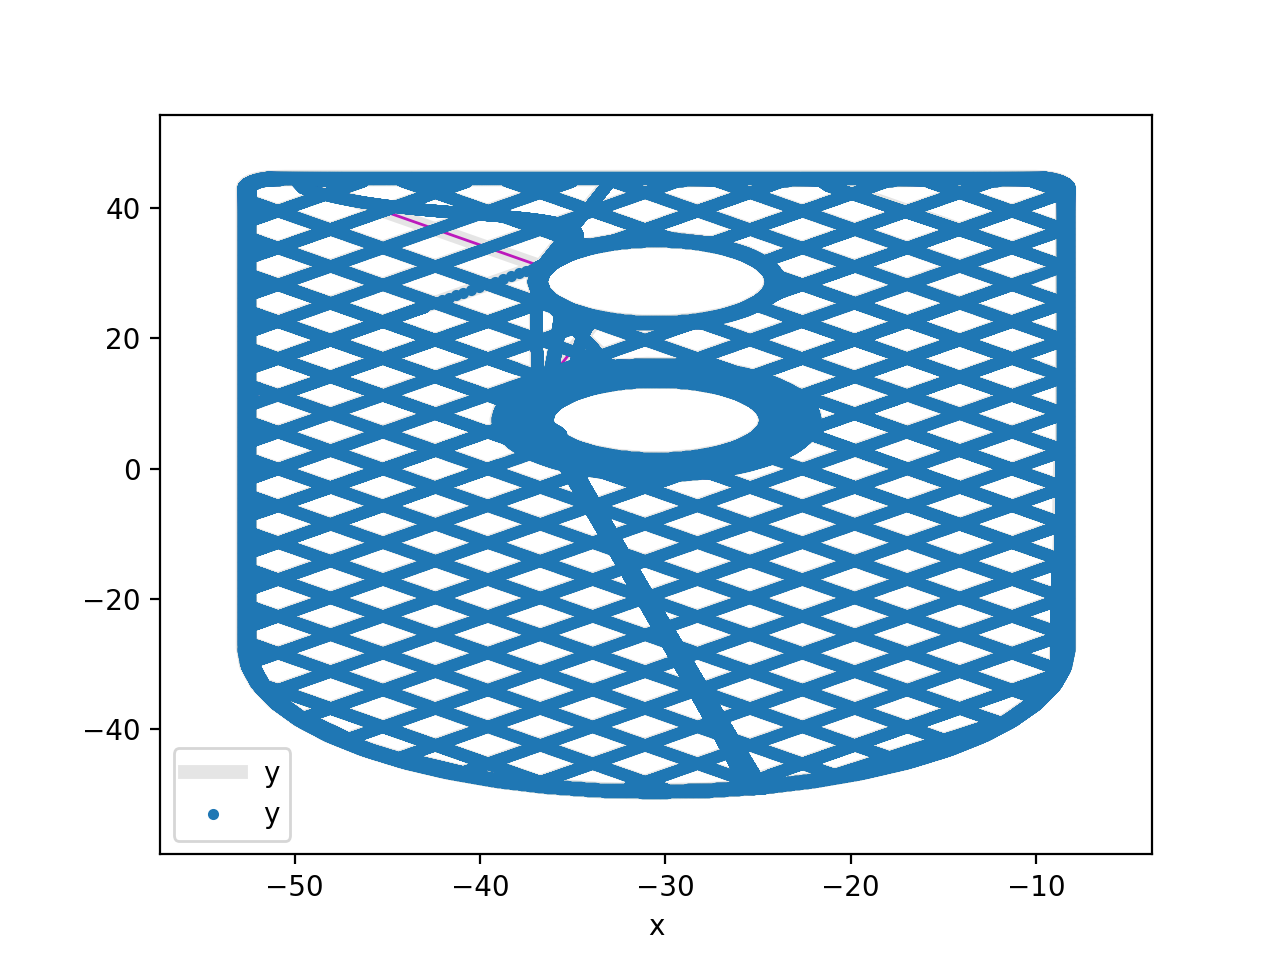

In [13]:
spm = 80
res["x"] = res["X_x"] / spm
res["y"] = res["Y_x"] / spm
res["xv"] = res["X_v"] * 65536 / 2**32 / spm * 50000000
res["yv"] = res["Y_v"] * 65536 / 2**32 / spm * 50000000
res[["x", "y", "xv", "yv", "ts"]]

lines = []
colors = []

i = 0
for index, row in all_segments.iterrows():
    i += 1
    lines.append(((row['x0'], row['y0']), (row['x1'], row['y1'])))
    st = row["seg_type"]
    if st == "start":
        colors.append((1,0,0,1))
    elif st == "end":
        colors.append((0,1,0,1))
    elif st == "short_plato":
        colors.append((0,0.3,1,1))
    elif st == "middle_plato":
        colors.append((0.8,0,0.8,1))
    elif st == "long_plato_main":
        colors.append((0.2,0.2,0.2,1))
    elif st == "long_plato_in":
        colors.append((1,0,0.8,1))
    elif st == "long_plato_out":
        colors.append((0,1,0.8,1))
    else:
        colors.append((1,1,0,1))
    
lc = LineCollection(lines, colors=colors, linewidths=1)
fig, ax = plt.subplots()

ax.add_collection(lc)

#path.iloc[limit:].plot(x="px", y="py", linewidth=3, color=(0.5, 0.5, 0.5, 0.2), ax=ax)
full_path = pd.DataFrame()
full_path["x"] = path["px"]
full_path["y"] = path["py"]
last_x = path["x"].iloc[-1]
last_y = path["y"].iloc[-1]
full_path = full_path.append({"x": last_x, "y": last_y}, ignore_index=True)
full_path.plot(x="x", y="y", linewidth=5, color=(0.5, 0.5, 0.5, 0.2), ax=ax)
res.plot(x="x", y="y", style=".", ax=ax)
    
ax.autoscale()
ax.margins(0.1)